## **CNN for Fruits and Vegetables Image Recognition**

# Overview

In this project, we implement a Convolutional Neural Network (CNN) for image classification to detect and classify fruits and vegetables. The dataset consists of images categorized into 36 distinct classes











*   Capsicum
*   Sweetcorn

*   Orange
*   Tomato

*   Tumip
*   Ginger

*   Raddish
*   Pomegranate

*   Pineapple
*   Jalapeno

*    Apple
*    Carrot

*   Lettuce
*   Bell pepper

*   Eggplant
*   Beetroot

*   Kiwi

*   Pear

*   Cabbage

*   Cauliflower

*   Paprika
*   Lemon


*   Sweet Potato


*   Grapes


*   Cucumber


*   Corn

*   Banana

*   Garlic

*   Chilli Pepper
*   Watermelon


*   Mango


*   Peas

*   Onion

*   Potato

*   Spinach
*   Soy beans









The goal of this project is to classify images of fruits and vegetables into one of these 35 categories. We trained a CNN model to learn patterns from these images and predict the corresponding class. The model is evaluated based on its accuracy, and predictions are displayed along with their associated confidence levels





By leveraging techniques such as Convolutional Layers, Max-Pooling, and Batch Normalization, the model demonstrates high performance in identifying various fruits and vegetables. This approach can potentially aid in applications such as quality control in agriculture, automated sorting systems, and fostering awareness about nutritional diversity.


























# Requirments

In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import cv2 as cv
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download data through kaggle api
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0


In [ ]:
# unzip the file
zip = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip.extractall()
zip.close()

In [ ]:
# load the data
train_ds =  image_dataset_from_directory(
    '/content/train',
    seed=123,
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32

)

test_ds = image_dataset_from_directory(
    '/content/test',
    seed=123,
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    '/content/validation',
    seed=123,
    label_mode='categorical',
    image_size=(224,224),
    batch_size=32
)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [ ]:
# improve performance
train = train_ds.cache().shuffle(1000).prefetch(1)
test = test_ds.cache().shuffle(1000).prefetch(1)
val = val_ds.cache().shuffle(1000).prefetch(1)

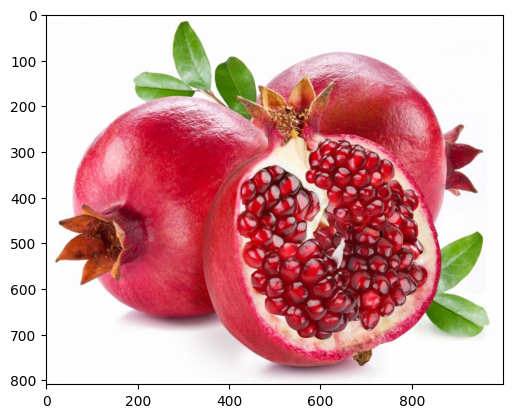

In [ ]:
# image path in pomegranate
image_po = '/content/train/pomegranate/Image_100.jpg'
image = mpimg.imread(image_po)
plt.imshow(image)
plt.show()

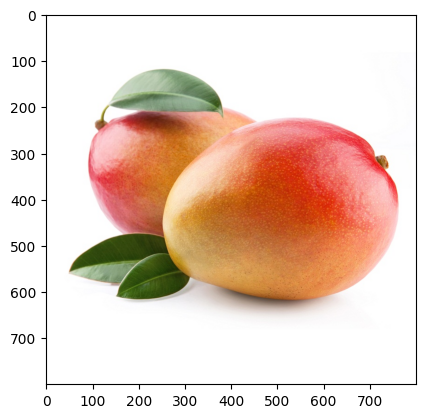

In [ ]:
# image path in mango
image_man = '/content/train/mango/Image_100.jpg'
image_s = mpimg.imread(image_man)
plt.imshow(image_s)
plt.show()

In [ ]:
# model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu',strides=(2,2)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(36,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 36)                  │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,884 (855.02 KB)

 Trainable params: 218,884 (855.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# early stopping
es =EarlyStopping(
    monitor= 'val_accuracy',
    mode='max',
    patience=10,
    verbose=1
)

re = ReduceLROnPlateau(
    monitor= 'val_accuracy',
    mode='max',
    patience=3,
    verbose=2,
    factor=0.5,
    min_lr= 1e-30

)

mo = ModelCheckpoint(
    filepath='best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'

)

In [ ]:
# combine early stopping
callbacks=[es,re, mo]

In [ ]:
# training the model
history = model.fit(
    train,
    epochs=50,
    validation_data=val,
    callbacks=callbacks
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 135ms/step - accuracy: 0.0421 - loss: 4.5646 - val_accuracy: 0.1766 - val_loss: 2.8842 - learning_rate: 0.0010
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1588 - loss: 2.8528 - val_accuracy: 0.2479 - val_loss: 2.3034 - learning_rate: 0.0010
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2298 - loss: 2.5658 - val_accuracy: 0.4017 - val_loss: 1.8854 - learning_rate: 0.0010
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3119 - loss: 2.2484 - val_accuracy: 0.3818 - val_loss: 1.8785 - learning_rate: 0.0010
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3253 - loss: 2.1172 - val_accuracy: 0.5499 - val_loss: 1.4943 - learning_rate: 0.0010
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3908 - loss: 1.9488 - val_accuracy: 0.5812 - val_loss: 1.4198 - learning_rate: 0.0010
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4206 - loss: 1.8308 - val_a

In [ ]:
# accuracy on test data
test_loss, test_accuracy = model.evaluate(test, verbose=1)

print(f'test loss => {test_loss}')
print(f'test accuracy => {test_accuracy}')

model.evaluate(val, verbose=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9723 - loss: 0.1901 
test loss => 0.24000787734985352
test accuracy => 0.961002767086029
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9652 - loss: 0.2093


[0.2454620599746704, 0.9601139426231384]

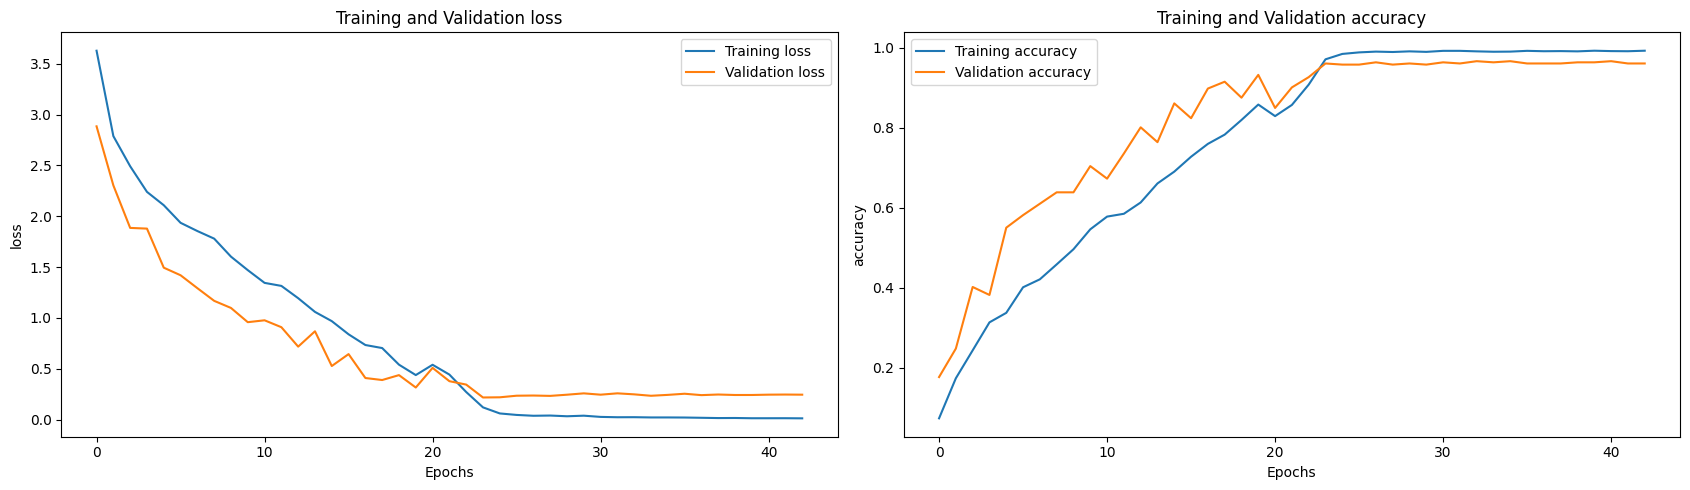

In [ ]:
# visualizing
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()